In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pandas import read_csv, DataFrame
from matplotlib import pyplot

## Config Vars

In [2]:
conf_test_dataset_path = 'data/test_dataset.csv'
shift_predictions_path = 'data/shift_predictions'
model_type = 'lstm'
conf_dataset_columns_to_drop = ["@timestamp"]
shifts = 5

## Load Dataset

In [3]:
train_dataset = read_csv(conf_test_dataset_path , header=0, index_col=0)
train_dataset.drop(conf_dataset_columns_to_drop, axis=1, inplace=True)
train_dataset[train_dataset.columns] = StandardScaler().fit_transform(train_dataset)
train_dataset_no_anotation = train_dataset.drop("anomaly", axis=1)

In [4]:
train_dataset = read_csv(conf_test_dataset_path , header=0, index_col=0)

## Load Predctions

In [5]:
shift_predictions = []
for shift in range(1, shifts+1):
    dset = read_csv(shift_predictions_path + '/predicted_data_' + model_type + '_model_' + str(shift) + '.csv' , header=0, index_col=0)
    shift_predictions.append(dset)

In [24]:
pred = shift_predictions[0]['system.diskio_sda.iostat.await']
true = train_dataset['system.diskio_sda.iostat.await'].shift(-1)

In [31]:
xmarks=[i for i in range(40000,50000+1,100)]

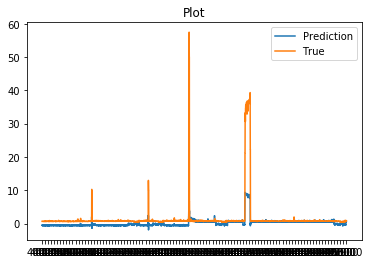

In [32]:
pyplot.figure()
pyplot.plot(pred, label='Prediction')
pyplot.plot(true, label='True')
pyplot.legend()
pyplot.title("Plot")
pyplot.show()